# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_05_004
## Нелінійна фільтрація. Фільтри виділення окремих точок та прямих

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

#### Завантаження тестового зображення. Зверніть увагу на градієнтний фон

In [2]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Test_BW_points.jpg'
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 200, 3) IMAGE SIZE 120000
ROWS NUMBER 200 CLMS NUMBER 200 PIX NUMBER 40000 Bins 256


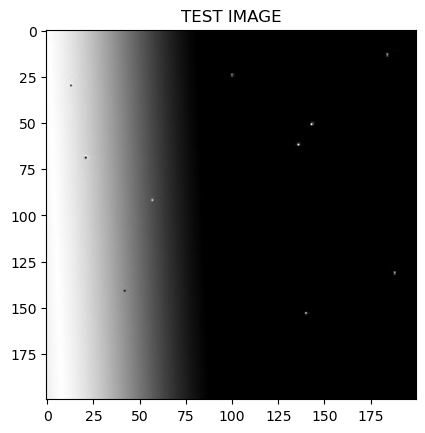

In [3]:
## Вивід тестовго зображення
plt.title('TEST IMAGE')
plt.imshow(test_im)
plt.show()

####  Виділення окремих точок 

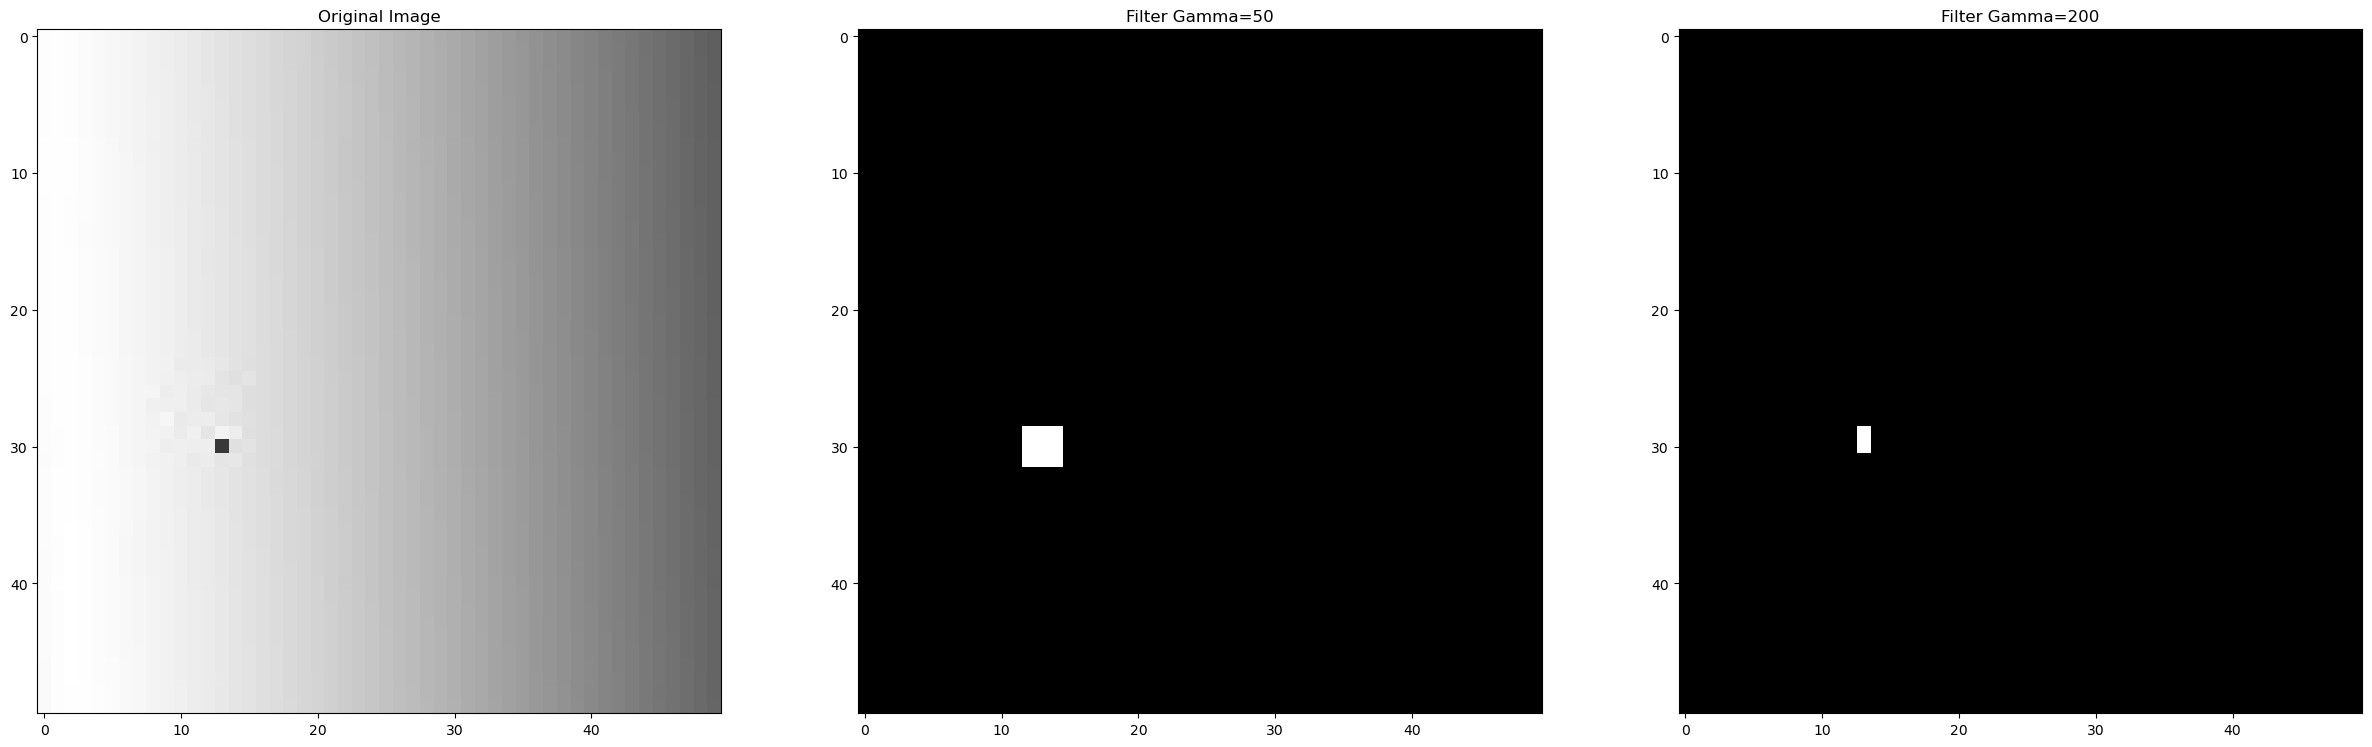

In [4]:
## Визначення параметрів маски фільтру
L = 3 ; mask_row = L ; mask_clm = L

Gamma1 = 100 # зріз для першого фільтрованого зоббраження
Gamma2 = 250 # зріз для другого фільтрованого зоббраження

## Визначення файлу перевореного зображення
test_im_ = np.int32(test_im) 
filtr_im_g1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)
filtr_im_g2 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        I_Sum = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                I_Sum += test_im_ [i-(1-k), j-(1-l), 0]
        # 9 для урахування центрального пікселя в сумі        
        I_Sum = np.abs(9 * test_im_ [i, j, 0]- I_Sum)
                
        if I_Sum >= Gamma1: filtr_im_g1 [i,j,:] = 255
        if I_Sum >= Gamma2: filtr_im_g2 [i,j,:] = 255
            

## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im[0:50,0:50,:])
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_g1[0:50,0:50,:])
ax[1].set_title("Filter Gamma=50")
ax[2].imshow(filtr_im_g2[0:50,0:50,:])
ax[2].set_title("Filter Gamma=200")
plt.show()

#### Виділення  відрізков прямих

In [5]:
## Завантаження тестовго зображення
path = './images/'
filename = 'Test_BW_lines.jpg'
test_im = io.imread(path + filename)

## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 200, 3) IMAGE SIZE 120000
ROWS NUMBER 200 CLMS NUMBER 200 PIX NUMBER 40000 Bins 256


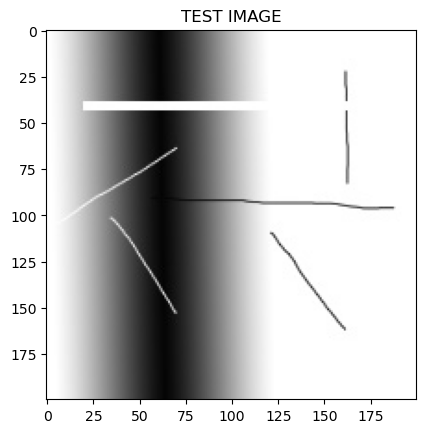

In [6]:
## Вивід оррігінального зображення  та зображення з шумомо 
plt.title('TEST IMAGE')
plt.imshow(test_im)
plt.show()

#### Використовємо фільтр для точки

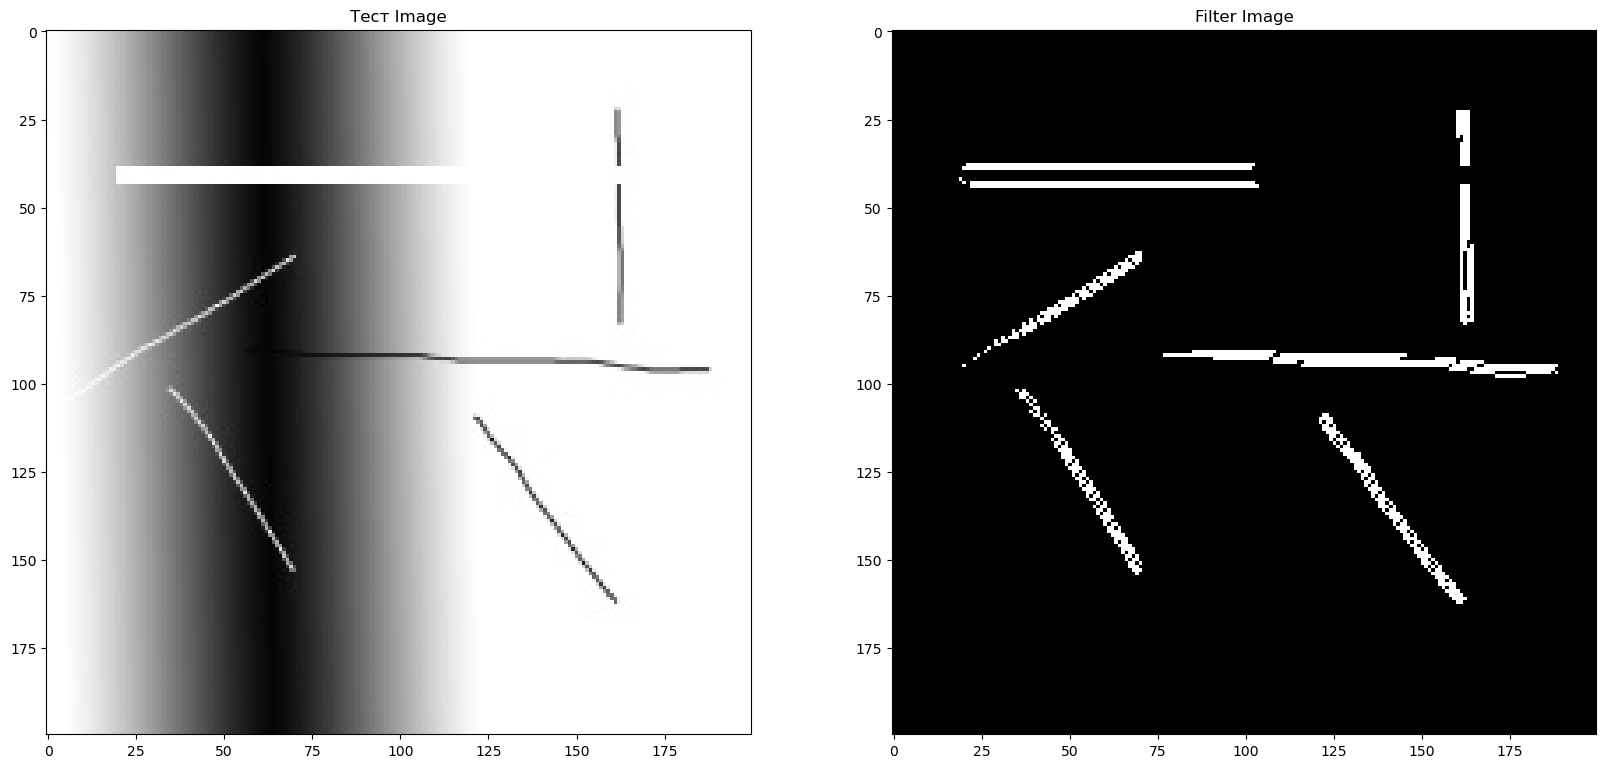

In [7]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L
## Визначення файлу перевореного зображення
Gamma = 200
test_im_ = np.int32(test_im) 
filtr_im_1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        I_Sum = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                I_Sum += test_im_ [i-(1-k), j-(1-l), 0]
        I_Sum = np.abs(9*test_im_ [i, j, 0]- I_Sum)
        # I_Sum = (9*test_im_ [i, j, 0]- I_Sum)
        
        if I_Sum >= Gamma: filtr_im_1 [i,j,:] = 255

## СУМІСНИЙ ТЕСТОВГО ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕНЬ
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Тест Image")
ax[1].imshow(filtr_im_1)
ax[1].set_title("Filter Image")
plt.show()

#### Фільтр для прямих ліній

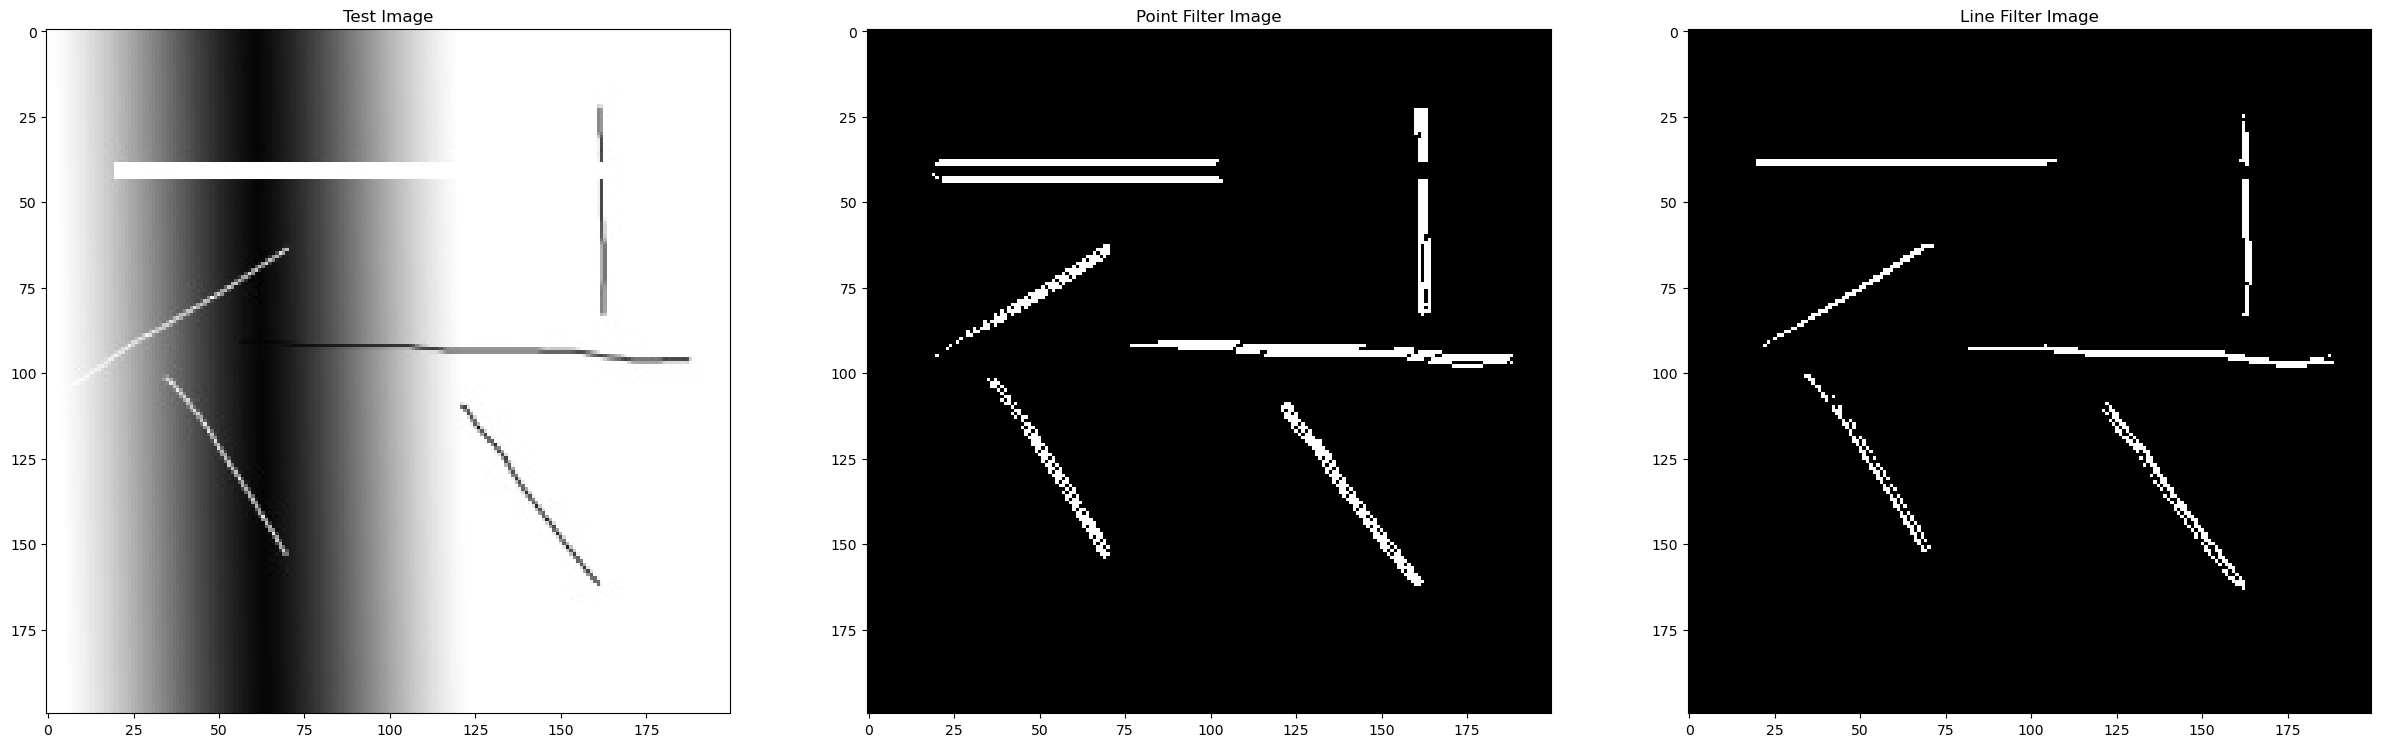

In [8]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L
## Визначення файлу перевореного зображення
Gamma = 240

filtr_im_2 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)
I_Sum   =  np.zeros (4, dtype=np.int32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        I_Sum[:] = 0
        I_Sum[0]  = 2 * (test_im_[i+1,j  ,0]+test_im_[i+1,j+1,0]+test_im_[i+1, j+1,0])- \
                        (test_im_[i-1,j-1,0]+test_im_[i-1,j  ,0]+test_im_[i-1, j+1,0] + \
                         test_im_[i , j,  0]+test_im_[i  ,j+1,0]+test_im_[i-1, j-1,0]   )

        I_Sum[1]  = 2 * (test_im_[i-1,j+1,0]+test_im_[i  ,j  ,0]+test_im_[i+1, j+1,0])- \
                        (test_im_[i-1,j  ,0]+test_im_[i-1,j+1,0]+test_im_[i  , j-1,0] + \
                         test_im_[i  ,j+1,0]+test_im_[i+1,j-1,0]+test_im_[i+1, j  ,0]    )
               
        I_Sum[2] = 2 * (test_im_[i-1,j  ,0]+test_im_[i  ,j+1,0]+test_im_[i+1, j+1,0])- \
                       (test_im_[i-1,j-1,0]+test_im_[i-1,j  ,0]+test_im_[i-1, j+1,0] + \
                        test_im_[i , j,  0]+test_im_[i  ,j+1,0]+test_im_[i+1, j  ,0]   )
        
        I_Sum[3] = 2 * (test_im_[i-1,j+1,0]+test_im_[i+1,j-1,0]+test_im_[i+1, j+1,0])- \
                       (test_im_[i-1,j-1,0]+test_im_[i-1,j  ,0]+test_im_[i-1, j+1,0] + \
                        test_im_[i , j,  0]+test_im_[i  ,j+1,0]+test_im_[i+1, j  ,0]   )

        I_max = 0
        for k in  range (0, 4):
            if I_max < I_Sum[k] : I_max = I_Sum[k]

        if I_max >= Gamma: filtr_im_2 [i,j,:] = 255

        ## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Test Image")
ax[1].imshow(filtr_im_1)
ax[1].set_title("Point Filter Image")
ax[2].imshow(filtr_im_2)
ax[2].set_title("Line Filter Image")
plt.show()